# Разведочный анализ данных. Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 0. Коротко o EDA

**Exploratory Data Analysis**, разведочный или эксплоративный анализ данных - это изучение данных для 
- нахождения паттернов в данных
- формулирования гипотез по данным
- предобработки данных

Существует **два** основных инструмента EDA:
- расчет описательных статистик и корреляций по данным
- визуализация данных

Под **описательными статистиками** мы имеем в виду следующие функции от выборки:
- количество элементов в выборке
- минимум
- максимум
- среднее значение
- стандартное отклонение
- медиану
- нижнюю и верхнюю квартили

Основные типы **визуализаций**:
- гистограмма
- столбцовая диаграмма
- точечная диаграмма
- линейный график
- ящик с усами

# 1. Задача

В наших руках оказались исторические данные по продажам $45$ магазинов Walmart, расположенных в разных регионах. Каждый магазан содержит несколько отделов. Наша задача спрогнозировать продажи по каждому отделу для каждого магазина. Зачем нужно уметь прогнозировать подобные вещи?

В случае конкретной задачи: 

- Если мы привезли в магазин слишком мало товара, потребителем его не хватит.
- Если мы привезли в магазин слишком много товара, то возникают лишние расходы, связанные с хранением товаров, а также лишние расходы, связанные с просрочкой товаров.

Хотелось бы уметь избегать всех этих лишних расходов и привозить в каждый магазин ровно столько товара, сколько нужно. В идеале прогнозируется продажи каждого вида товаров, но поскольку в исходных данных нет детализации, будем прогнозировать продажи по магазину.

Если говорить в целом о задаче прогноза спроса, она позволяет планировать. В первую очередь, выручку, а дальше считать все важные финансовые показатели, маркетингу понимать, где активизироваться, на какие магазины (или группы клиентов работать). 



# 2. Данные

* `Weekly_Sales` - объём продаж в данную неделю в данном отделе (целевая переменная)
* `Store` - номер магазина;
* `Type` - тип магазина;
* `Size` - размер магазина;
* `Dept` - номер отдела;
* `Date` - дата;
* `IsHoliday` - является ли неделя праздничной;

В Walmart работает несколько акций по уценке товаров. Эти уценки обычно связаны с праздниками: Суперкубок, день Труда, день Благодарения, Рождество. С этими периодами нужно быть аккуратным. Продажи в эти дни аномальны, при этом наблюдений, связанных с этими аномалиями довольно мало.

Для удобства вот информация о всех праздниках, попавших в датасет: 

```
Суперкубок: 12-Фев-10, 11-Фев-11, 10-Фев-12
День Труда: 10-Сен-10, 9-Фев-11, 7-Сен-12
День Благодарения: 26-Ноя-10, 25-Ноя-11, 23-Ноя-12
Рождество: 31-Дек-10, 30-Дек-11, 28-Дек-12
```

* `Temperature` - средняя температура в регионе в градусах по Фаренгейту;
* `Fuel_Price` - стоимость топлива в регионе;
* `MarkDown1-5` - данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы.
* `CPI` - индекс потребительских цен.
* `Unemployment` - уровень безработицы


* `Weekly_Sales` - объём продаж в данную неделю в данном отделе (целевая переменная)
* `Store` - номер магазина;
* `Type` - тип магазина;
* `Size` - размер магазина;
* `Dept` - номер отдела;
* `Date` - дата;
* `IsHoliday` - является ли неделя праздничной;
* `Temperature` - средняя температура в регионе в градусах по Фаренгейту;
* `Fuel_Price` - стоимость топлива в регионе;
* `MarkDown1-5` - данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы.
* `CPI` - индекс потребительских цен.
* `Unemployment` - уровень безработицы


# 3. EDA & Feature Engineering. Сага в трех эпизодах 

## Эпизод 1. Проверки на вменяемость

### Читаются ли данные? 

In [3]:
# Считаем данные в переменную data. Обратите внимание, что данные разделены табуляцией
# Выведите первые несколько строк на экран

In [4]:
data = pd.read_csv('walmart.csv', sep='\t')
data.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-05,2,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,2010-02-05,3,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,2010-02-05,4,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,2010-02-05,5,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


### Что можем узнать о данных в целом?

In [5]:
# Методом info() выведите сводные данные о датасете

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Dept          421570 non-null  int64  
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


- Есть пропуски
- Типы данных в памяти не соответствуют реальным типам (Store, Dept - int64, int64) 

### Дубли

**Откуда появляются**
- Загрузили данные или часть несколько раз
- Пользователь зарегистрировался в системе несколько раз 
- Несколько сенсоров записали одно и то же событие 
- Намеренный ввод дубликатов 


**Как спасаться**
- Ограничения целостности
- Принудительная валидация
- Улучшение процессов
- Целенаправленный поиск дубликатов 



In [7]:
# Распечатайте размер датасета
# Удалите дубликаты и снова рассчитайте и распечатайте размер датасета. 
# Есть ли дубликаты?

In [8]:
print('Размер данных:', data.shape)
print('Размер данных после удаления дубликатов:', data.drop_duplicates().shape)

Размер данных: (421570, 16)
Размер данных после удаления дубликатов: (421570, 16)


### Пропуски

**Есть ли в датасете пропуски?**

In [9]:
# Проверьте наличие пропусков в датасете. Вам пригодится метод isna() или isnull()
# Можно посчитать количество пропусков в каждом столбце. Можно сделать визуализацию пропусков

In [10]:
data.isnull().sum()

Store                0
Date                 0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

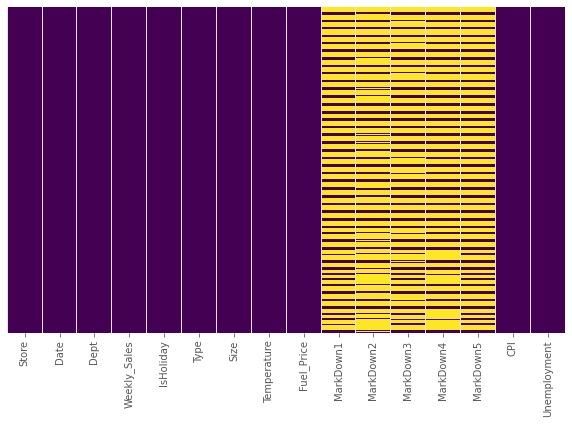

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Эпизод 2. Как устроены данные?

### Целевая переменная

Одна картинка вместо тысячи слов

In [12]:
# Для начала давайте построим график средних еженедельных продаж в каждую из доступных недель

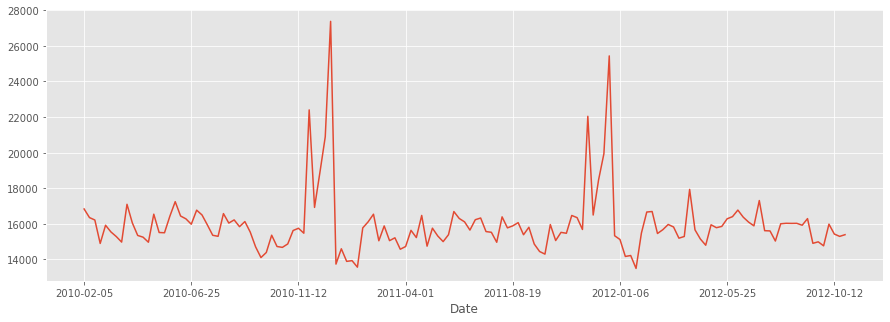

In [13]:
data.groupby('Date')['Weekly_Sales'].mean().plot(figsize=(15,5));

- Есть сезонность в целевой переменной

In [14]:
# теперь построим гистограмму значений

<AxesSubplot:>

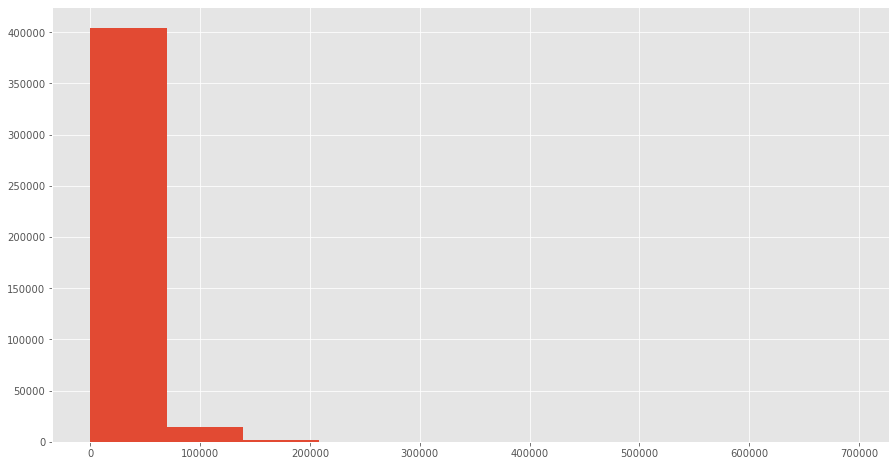

In [58]:
data.Weekly_Sales.hist(figsize=(15, 8))

In [16]:
# чтобы точно убедиться в беде, давайте нарисуем ящик с усами

<AxesSubplot:xlabel='Weekly_Sales'>

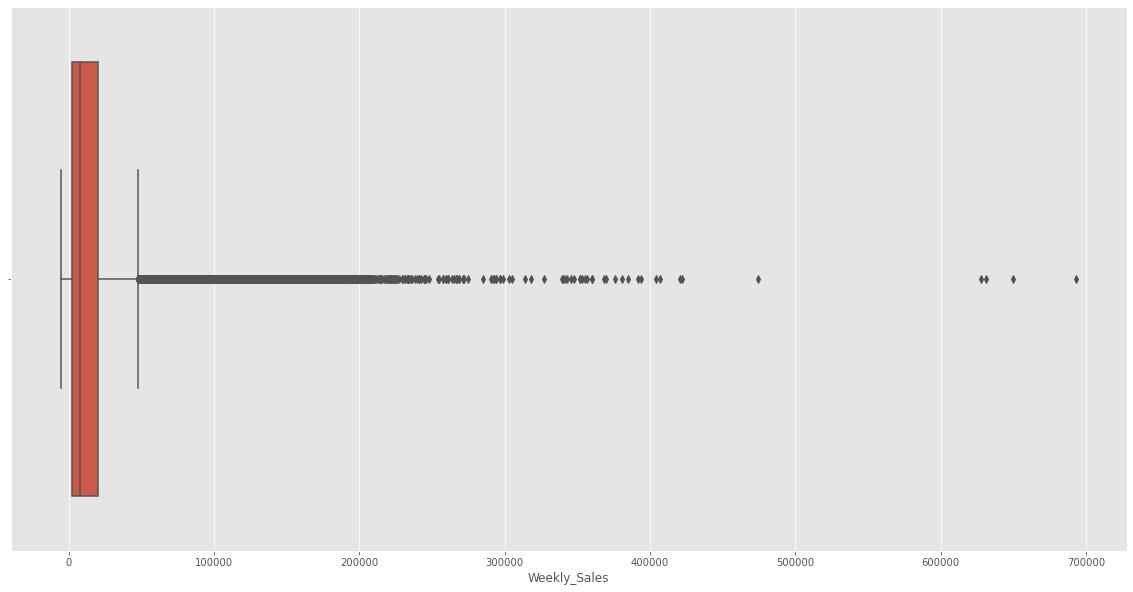

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(data.Weekly_Sales)

- Тяжелый хвост справа

Расчет описательных статистик - тоже важный и информативный шаг

In [18]:
# методом describe() рассчитайте описательные статистики для столбца Weekly Sales

In [19]:
data.Weekly_Sales.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

- Есть отрицательные значения. В каком масштабе?

In [20]:
# рассчитайте количество строк с отрицательными продажами

In [21]:
data.Weekly_Sales[data.Weekly_Sales < 0].count()

1285

### Признаки

Для удобства распределим признаки в два листа - с категориальными переменными и с числовыми

In [22]:
# категориальные переменные 
var_cat = ['Type', 'Store', 'Dept', 'IsHoliday']

# непрерывные переменные
var_real = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'CPI', 'Unemployment', 
            'Temperature', 'Fuel_Price','Size']

#### Категориальные  переменные 

In [23]:
# выведите описательные статистики для категориальных переменных 

In [24]:
data[var_cat].astype('object').describe()

,Type,Store,Dept,IsHoliday
count,421570,421570,421570,421570
unique,3,45,81,2
top,A,13,1,False
freq,215478,10474,6435,391909


In [25]:
# теперь нарисуем столбцовые диаграммы по каждой из категорий. 
# организовать это задание можно разными способами, выберите любой из них

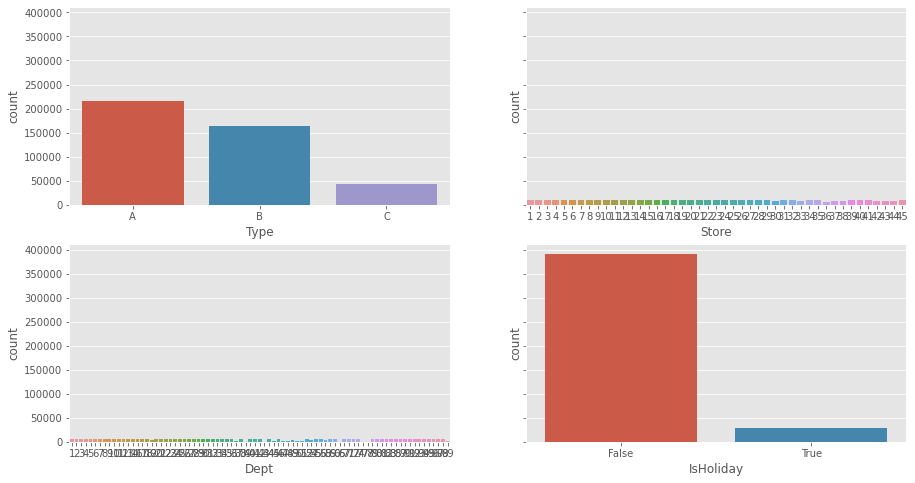

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharey=True)

for i in range(len(var_cat)):
    sns.countplot(x=var_cat[i], data=data, ax=axes[i // 2, i % 2])

In [27]:
data['Store'].value_counts()[-10:]  


5     8999
9     8867
38    7362
37    7206
44    7169
30    7156
42    6953
43    6751
33    6487
36    6222
Name: Store, dtype: int64

In [28]:
data['Dept'].value_counts()[-10:]  


48    1742
50    1562
51    1394
99     862
47     646
78     235
77     150
65     143
39      16
43      12
Name: Dept, dtype: int64

- Обработка столбцов Type, IsHoliday, Store не требует дополнительных действий, столбец Dept требует внимания

#### Численные переменные

In [29]:
# рассчитайте описательные статистики для численных переменных

In [30]:
data[var_real].describe()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Temperature,Fuel_Price,Size
count,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,60.090059,3.361027,136727.915739
std,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,18.447931,0.458515,60980.583328
min,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,-2.060000,2.472000,34875.000000
25%,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,46.680000,2.933000,93638.000000
50%,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,62.090000,3.452000,140167.000000
75%,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.280000,3.738000,202505.000000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,100.140000,4.468000,219622.000000


- В маркдаунах есть отрицательные значения

In [31]:
# нарисуйте гистограммы признаков

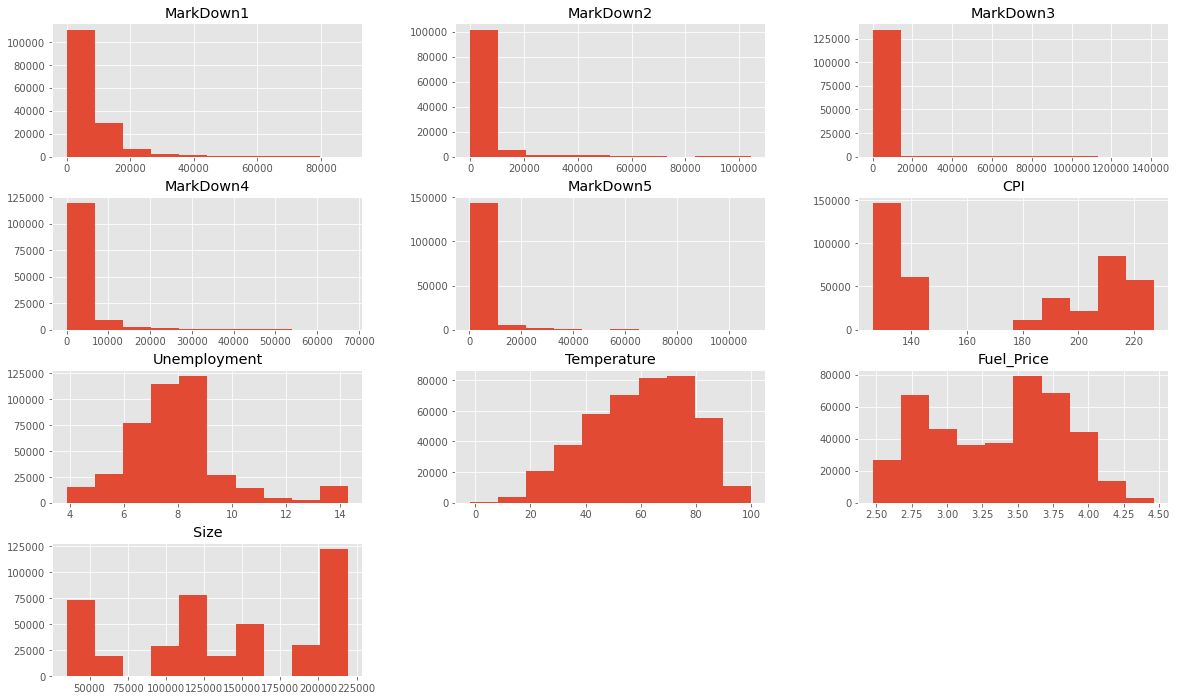

In [32]:
data[var_real].hist(figsize=(20, 12));

In [33]:
# нарисуйте матрицу корреляций

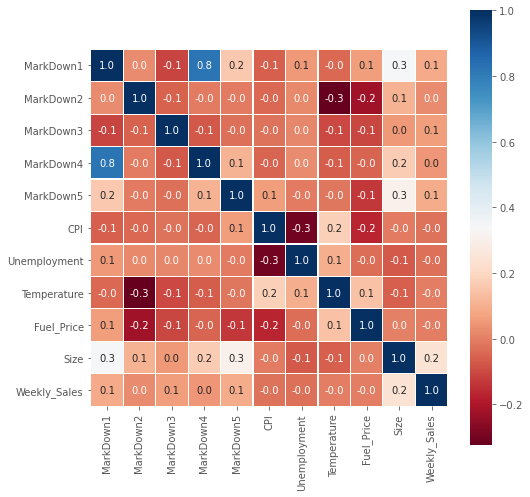

In [34]:
plt.figure(figsize=(8,8))
corr = data[var_real + ['Weekly_Sales']].corr()

sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

## Эпизод 3. Feature Engineering

Мы изучили данные, сделали **разведочный анализ** и узнали вот что:
- в данных нет дублей
- в данных есть пропуски - их чем-то надо закрыть
- в целевой переменной есть отрицательные значения, надо решить, оставить или удалить
- у целевой переменной длинный хвост -- надо его поправить
- в переменных об уценках нужно принять схожее решение
- колонка Data выглядит не очень трактуемой, надо с ней сотворить что-то прикладное
- в данных есть категориальные колонки, их нужно трансформировать в удобовариемый вид
- в одной из категориальных колонок - очень-очень много мелких категорий


### Пропуски

In [35]:
# заполните пропуски

In [36]:
data.fillna(0, inplace=True)

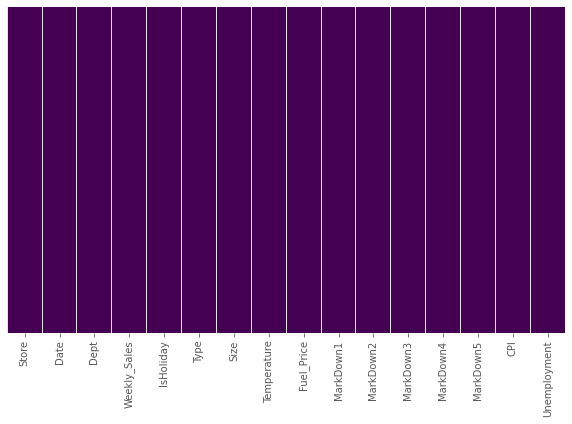

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Целевая переменная

In [38]:
# удалите все строки, где целевая переменная отрицательная

In [39]:
data = data[data.Weekly_Sales > 0]

In [40]:
# c длинными хвостами борются логарифмирование
# прологарифмируйту колонку Weekly Sales и сохраните в новую ln_weekly_sales

In [41]:
data['ln_weekly_sales'] = data['Weekly_Sales'].apply(lambda w: np.log(w))

In [42]:
# визуализируйте с помощь гистограмм исходное распределение и прологарифмированное

array([[<AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'ln_weekly_sales'}>]], dtype=object)

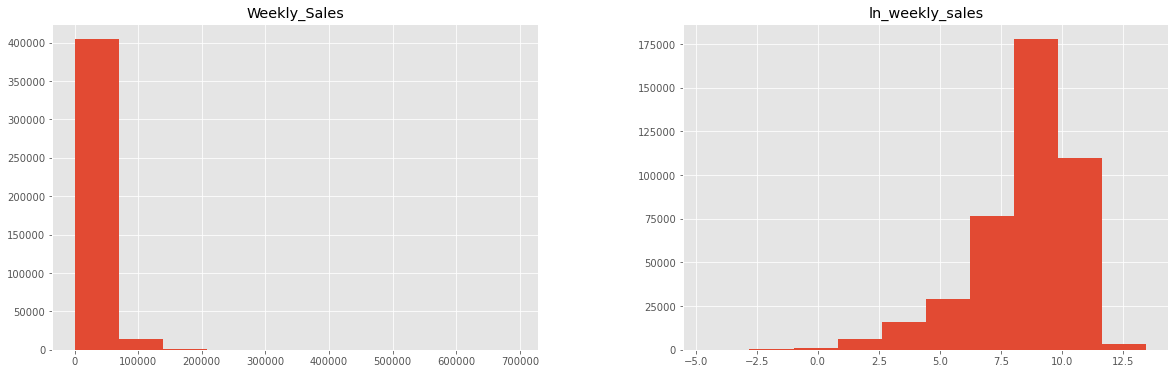

In [43]:
data[['Weekly_Sales', 'ln_weekly_sales']].hist(figsize=(20, 6))

### Дата

In [44]:
# функцией pd.to_datetime преобразуйте колонку из текста в дату

In [45]:
data.Date = pd.to_datetime(data.Date)
data.Date

0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
            ...    
421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, Length: 420212, dtype: datetime64[ns]

In [46]:
# выделите в качестве признака месяц

In [47]:
data['Month'] = data['Date'].dt.month


In [48]:
data['Black_Friday'] = (np.where((data['Date']=='2010-11-26') |
                              (data['Date']=='2011-11-25') | 
                              (data['Date']=='2012-11-23'), 1, 0))

# Предрождественские деньки: 
data['Pre_christmas'] = (np.where((data['Date']=='2010-12-23') | 
                               (data['Date']=='2010-12-24') | 
                               (data['Date']=='2011-12-23') | 
                               (data['Date']=='2011-12-24') |
                               (data['Date']=='2012-12-23') | 
                               (data['Date']=='2012-12-24'), 1, 0))

### Категориальные переменные

In [49]:
# сделаем все колонки категориальных переменных типа object

In [50]:
data[var_cat] = data[var_cat].astype('object')

In [51]:
# найдем маленькие категории в колонке Dept
# 1. создадим список всех категорий
# 2. найдем большие - такие, что в них более 4000 записей
# 3. найдем разницу в этих двух списках
# 4. выведем малые категории на печатть

In [52]:
uniq_category = data['Dept'].unique()  
counts = data['Dept'].value_counts()
big_category = counts[counts > 4000].index
small_category = list(set(uniq_category) - set(big_category))
print(small_category)

[65, 99, 37, 39, 43, 45, 77, 47, 48, 78, 50, 51]


In [53]:
# заменим в колонке маленькие категории на -1, а остальные номера оставим. 
# преобразуем в строковый тип данных 

In [54]:
data['Dept'] = data['Dept'].apply(lambda w: -1 if w in small_category else w).astype('object')

In [55]:
# финальный шаг, сделаем OHE-кодирование
# удалим из датасета колонку даты, и отдадим ее функции pd.get_dummies() на растерзание

In [56]:
data_transf = pd.get_dummies(data.drop('Date', axis=1), drop_first=True, dummy_na=False)


## Эпилог

In [57]:
data['future_sales'] = data.Weekly_Sales.shift(-1)
data = data[~data['future_sales'].isna()]